### Exercise 1
Implement the empirical cdf $F_n$ as a class called `ECDF` where,
- A given sample ${X_i}_{i=1}^n$ are the instance data, stored as `self.observations`
- The class implements a `__call__` method that returns $F_n(x)$ for any $x$

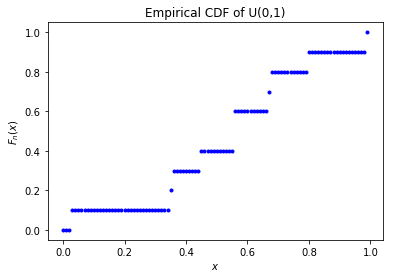

In [23]:
from random import uniform, normalvariate
import matplotlib.pyplot as plt

class ECDF:
    def __init__(self, sample):
        self.observations = sample
        self.N = len(self.observations)
       
    def __call__(self, x):
        return len([x_i for x_i in self.observations if x_i <= x])/self.N

F = ECDF([uniform(0, 1) for i in range(10)])
F(0.5)


x_to_plot = [i/100 for i in range(100)]
fig, ax = plt.subplots()
ax.plot(x_to_plot, [F(x) for x in x_to_plot], 'b.')
ax.set_xlabel('$x$')
ax.set_ylabel('$F_n(x)$')
ax.set_title('Empirical CDF of U(0,1)')
plt.show()

### Exercise 2
Build a simple class `Polynomial` for representing and manipulating polynomial functions. Provide methods that,
- Evaluate the polynomial, returning $p(x)$ for any $x$
- Differentiate the polynomial, replacing the original coefficients with those of its derivative, $p'$

In [74]:
class Polynomial:
    
    def __init__(self, coefficients):
        """
        Creates an instance of the Polynomial class representing
            p(x) = a_0 + a_1 x^1 + ... + a_n x^n
        where a_i = coefficients[i]
        """
        if not coefficients:
            coefficients = [0]
        self.coefficients = coefficients

    def __call__(self, x):
        "Evaluates the polynomial at x"
        return sum(x**i * a for i, a in enumerate(self.coefficients))
    
    def __str__(self):
        "Create a string representation"
        poly_str = ''
        for i, a in enumerate(self.coefficients):
            if a == 0:
                continue
            sign = '+' if a > 0 else '-'
            poly_str = '{0} {1} {2}'.format(poly_str, sign, abs(a))
            if i > 1:
                poly_str = '{0}x^{1}'.format(poly_str, i)
            elif i == 1:
                poly_str = poly_str + 'x'
        poly_str = poly_str.strip()
        if not poly_str:
            return '0'
        if poly_str[0] == '+':
            poly_str = poly_str[1:]
        return poly_str
        
    def differentiate(self):
        "Change the coefficients to those of the derivitive of p"
        self.coefficients = [i * a for i, a in enumerate(self.coefficients) if i > 0]
        if not self.coefficients:
            self.coefficients = [0]
        
        
p = Polynomial([-11,5,2])
x = 5

derivative = 0
while derivative < 5:
    derivative_symbol = '\'' * derivative
    print('p{0}(x) = {1}'.format(derivative_symbol, p))
    print('p{0}({1}) = {2}'.format(derivative_symbol, x, p(x)))
    derivative += 1
    p.differentiate()


p(x) = - 11 + 5x + 2x^2
p(5) = 64
p'(x) =  5 + 4x
p'(5) = 25
p''(x) =  4
p''(5) = 4
p'''(x) = 0
p'''(5) = 0
p''''(x) = 0
p''''(5) = 0
